In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

In [3]:
cols = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','Ph','sulphates','Alcohol']

In [4]:
len(cols)

11

In [5]:
df = pd.read_csv('red_wine.csv',header=None)

In [6]:
df_split = df[0].str.split(';',expand = True)

In [7]:
df_split

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,"""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [8]:
df_split.columns = df_split.iloc[0]

In [9]:
new_df = df_split.drop(0).reset_index(drop=True)

In [10]:
new_df.columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

In [11]:
new_df[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","density","pH","sulphates","alcohol"]] = new_df[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","density","pH","sulphates","alcohol"]].apply(pd.to_numeric, errors='coerce')

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   object 
 6   total sulfur dioxide  1599 non-null   object 
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(9), object(3)
memory usage: 150.0+ KB


In [13]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [14]:
new_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [15]:
new_df[['free sulfur dioxide','total sulfur dioxide']] = new_df[['free sulfur dioxide','total sulfur dioxide']].astype(float)

In [16]:
new_df['quality'] = new_df['quality'].astype(int)

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [18]:
new_df.shape

(1599, 12)

In [19]:
new_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
new_df['fixed acidity'].nunique()

96

In [21]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
new_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [23]:
new_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


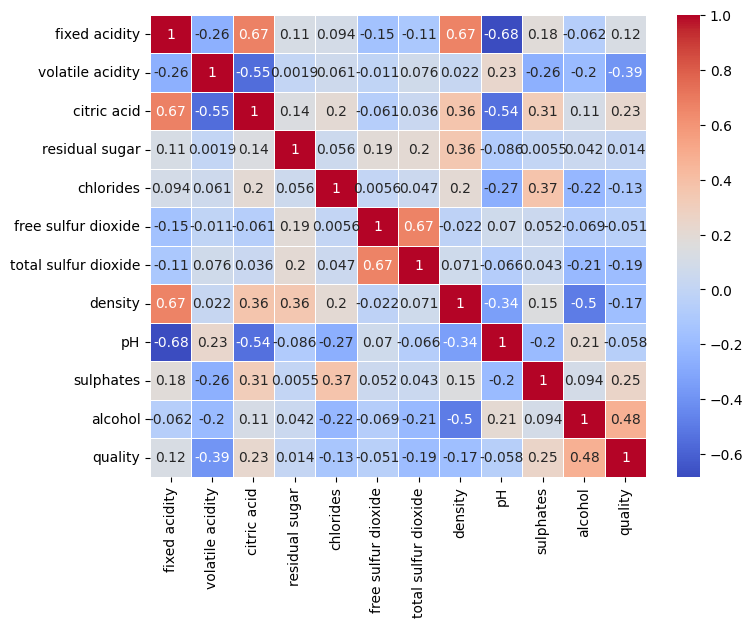

In [24]:
plt.figure(figsize=(8, 6))  
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

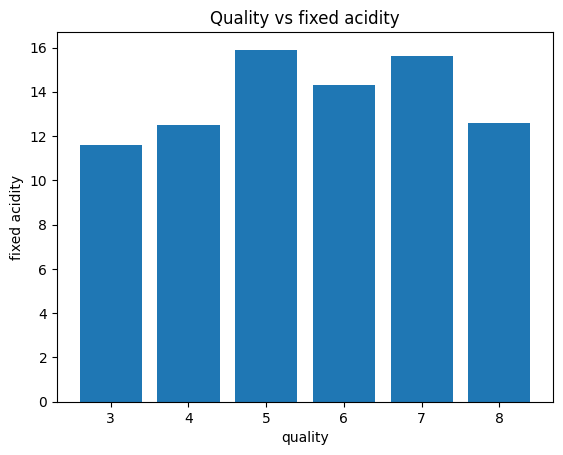

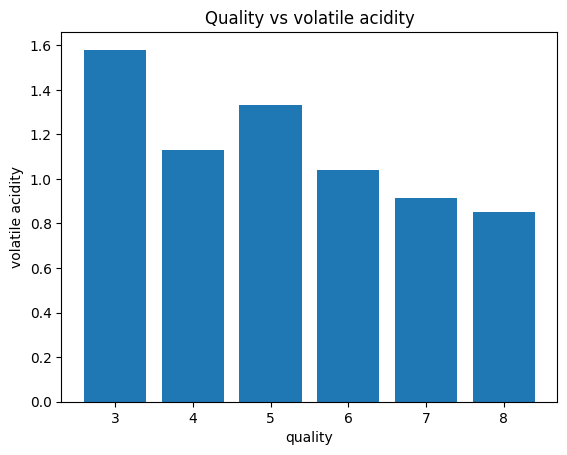

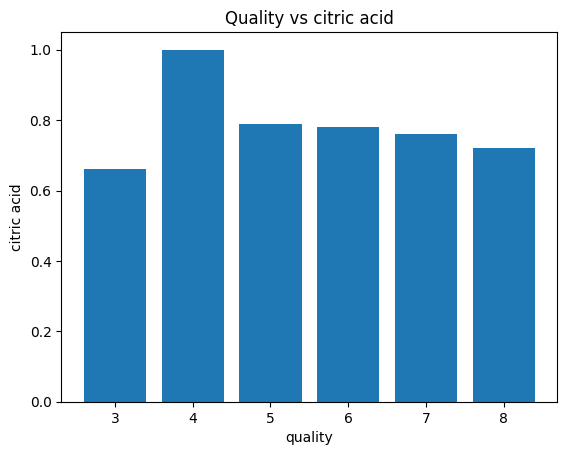

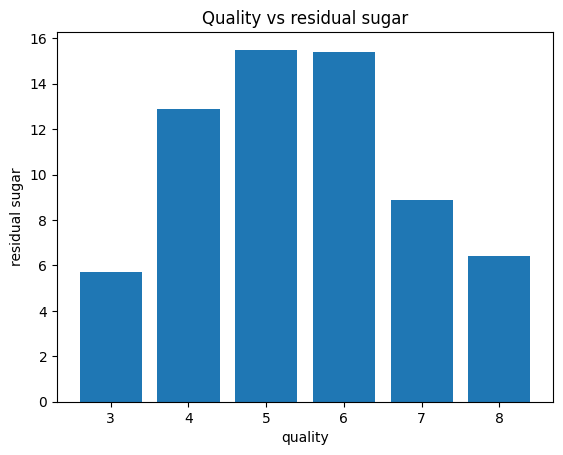

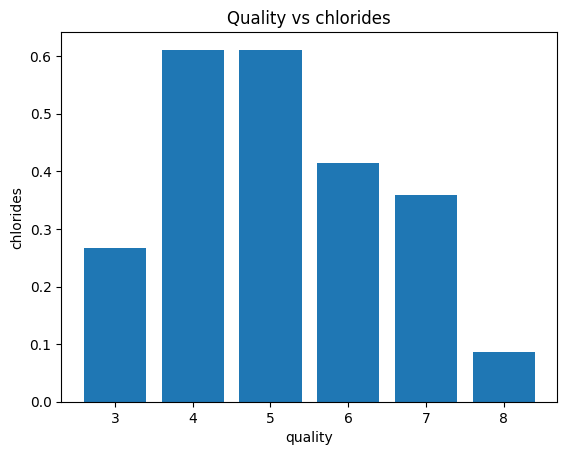

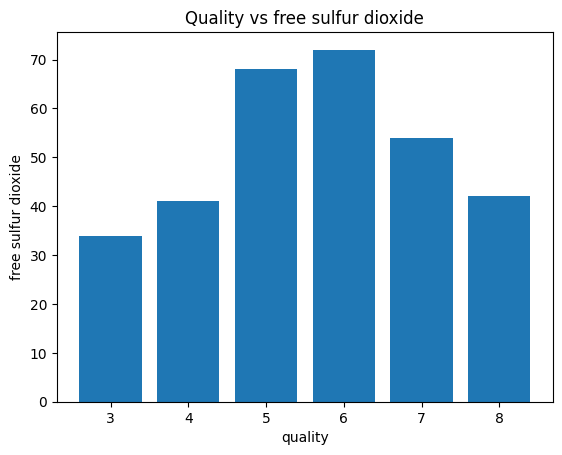

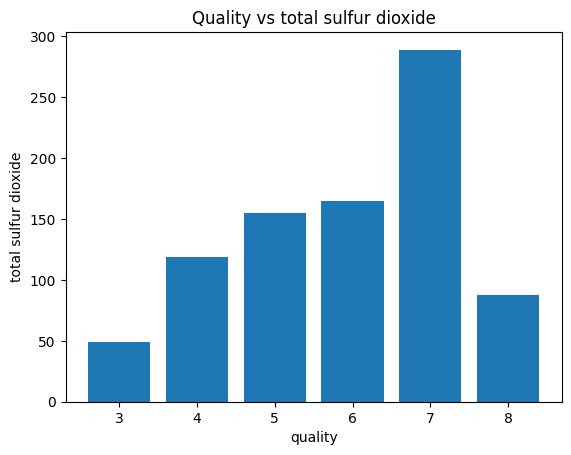

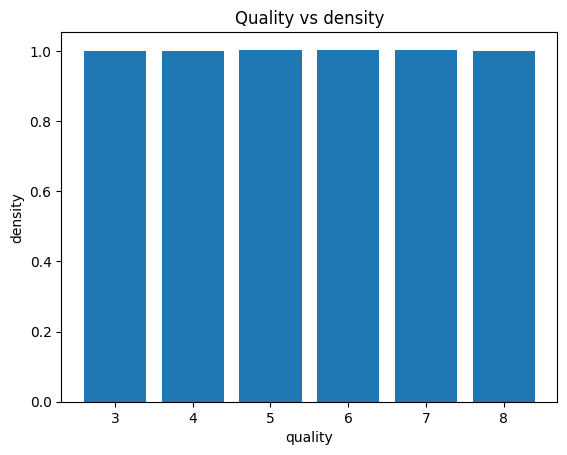

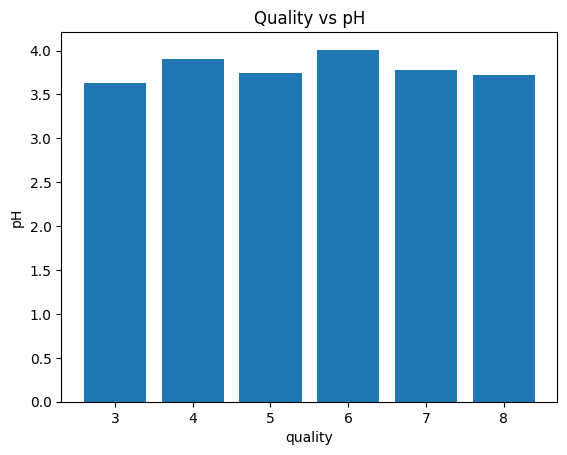

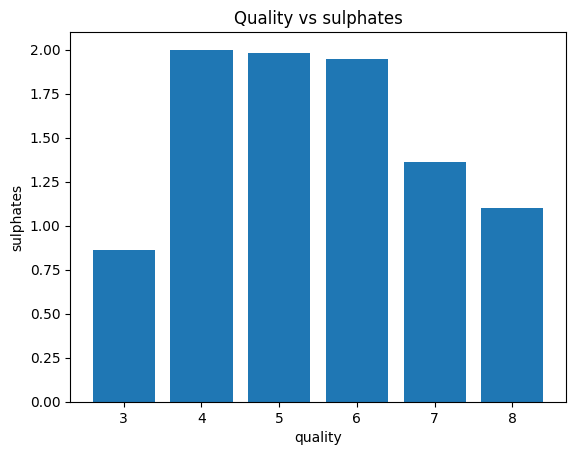

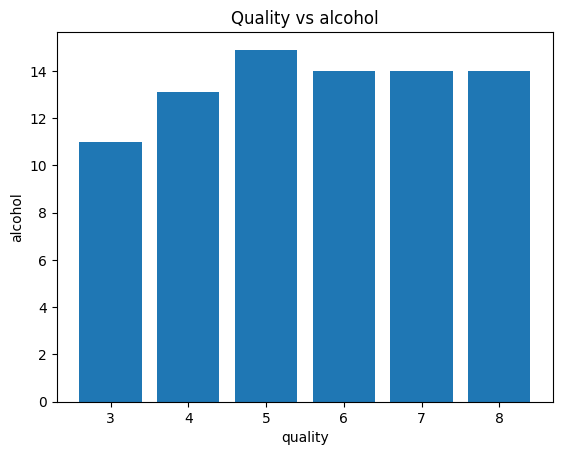

In [25]:
for i in range(len(new_df.columns)):
    if new_df.columns[i] != 'quality':  # Avoid plotting 'quality' against itself
        plt.bar(new_df['quality'], new_df[new_df.columns[i]])
        plt.title(f"Quality vs {new_df.columns[i]}")
        plt.xlabel('quality')
        plt.ylabel(new_df.columns[i])
        plt.show()

In [26]:
new_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [27]:
new_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [28]:
bins = [0,5.5,7.5,10]
labels = [0,1,2]
new_df['quality'] = pd.cut(new_df['quality'],bins = bins , labels = labels)

In [29]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [30]:
new_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [31]:
new_df['quality'].value_counts()

quality
1    837
0    744
2     18
Name: count, dtype: int64

In [32]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
ds_low = new_df[(new_df['quality']==0)]
ds_average = new_df[(new_df['quality']==1)]
ds_high = new_df[(new_df['quality']==2)]
# upsample minority class
ds_high_upsampled = resample(ds_high,
                                 replace=True,    # sample with replacement
                                 n_samples= 837, # to match majority class
                                 random_state=42)  # reproducible results
ds_low_upsampled = resample(ds_low,
                                 replace=True,    # sample with replacement
                                 n_samples= 837, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
ds = pd.concat([ds_average,ds_low_upsampled,ds_high_upsampled])

In [33]:
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,1
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,2
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,2
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,2
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,2


In [34]:
ds['quality'].value_counts()

quality
0    837
1    837
2    837
Name: count, dtype: int64

In [35]:
y = ds['quality']

In [36]:
y

3       1
7       1
8       1
16      1
19      1
       ..
481     2
1120    2
1269    2
440     2
1120    2
Name: quality, Length: 2511, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [37]:
X = ds.iloc[:,0:-1].values

In [38]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [39]:
x

array([[ 1.51403574, -1.25481713,  1.23377449, ..., -0.81331763,
        -0.69364303, -0.83441343],
       [-0.57663116,  0.88185849, -1.4870152 , ...,  0.54636317,
        -1.37833727, -0.68944114],
       [-0.30859694,  0.47762256, -1.38984414, ...,  0.3690135 ,
        -0.75588796, -1.05187188],
       ...,
       [-1.54155435, -0.04210935, -1.34125861, ...,  1.1966453 ,
         0.80023531,  2.21000481],
       [ 2.26453155, -1.08157316,  2.01114297, ..., -2.46858121,
         0.80023531, -0.83441343],
       [-0.2549901 ,  0.2466306 ,  0.16489283, ..., -0.5768514 ,
         0.177786  ,  1.55762948]])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_knn = KNeighborsClassifier()

In [43]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
k_predict = model_knn.predict(x_test)

In [45]:
kn_predict = model_knn.predict(x_train)

In [46]:
k_predict

array([0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0,
       1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0,

In [47]:
print("Accuracy : ", accuracy_score(y_test, k_predict))

Accuracy :  0.8156498673740054


In [58]:
print("Accuracy : ", accuracy_score(y_train, kn_predict))

Accuracy :  0.8764940239043825


In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model_nb = GaussianNB()

In [50]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [51]:
n_predict = model_nb.predict(x_test)

In [52]:
print("Accuracy : ", accuracy_score(y_test, n_predict))

Accuracy :  0.6790450928381963


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [55]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [56]:
r_predict = model_rf.predict(x_test)

In [59]:
rn_predict = model_rf.predict(x_train)

In [57]:
print("Accuracy : ", accuracy_score(y_test, r_predict))

Accuracy :  0.9045092838196287


In [60]:
print("Accuracy : ", accuracy_score(y_train, rn_predict))

Accuracy :  1.0
